# Week 1: Lab set up and test run

This week's lab is to help you set up the lab environment using either Colab or on your own computer, and ensure that you can run through code below.

In [1]:
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


## Loading MNIST

In this lab, we will be using the MNIST dataset, which is a set of 70,000 small images of digits handwritten by high school students and employees of the US Census Bureau. Each image is labeled with the digit it represents. This set has been studied so much that it is often called the “Hello World” of Machine Learning: whenever people come up with a new classification algorithm, they are curious to see how it will perform on MNIST. Whenever someone learns Machine Learning, sooner or later they tackle MNIST.

Scikit-Learn provides many helper functions to download popular datasets. MNIST is one of them. The following code fetches the MNIST dataset:

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

print(digits.data.shape)

(1797, 64)


In [17]:
# Print fields of the digits dataset
print("Keys of the digits dataset:")
print(digits.keys())

# Access and print information about the dataset
print("\nNumber of samples:", digits.data.shape[0])
print("Number of features per sample:", digits.data.shape[1])
print("Number of classes:", len(digits.target_names))

# Other relevant information
print("\nFeature names:")
print(digits.feature_names)

print("\nTarget names:")
print(digits.target_names)

# More detailed description
print("\nDataset Description:")
print(digits.DESCR)

Keys of the digits dataset:
dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

Number of samples: 1797
Number of features per sample: 64
Number of classes: 10

Feature names:
['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pi

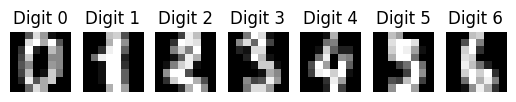

In [16]:
# Visualize the first few digits
num_digits_to_display = 7

for i in range(num_digits_to_display):
    plt.subplot(1, num_digits_to_display, i + 1)
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Digit {i}")
    plt.axis('off')

plt.show()

In [18]:
X_digits = digits.data
y_digits = digits.target

n_samples = len(X_digits)

X_train = X_digits[:round(.9 * n_samples)]
y_train = y_digits[:round(.9 * n_samples)]
X_test = X_digits[round(.9 * n_samples):]
y_test = y_digits[round(.9 * n_samples):]

## KNN classifier


Let’s simplify the problem for now and only try to identify one digit—for example, the number 5. This “5-detector” will be an example of a binary classifier, capable of distinguishing between just two classes, 5 and not-5. Let’s create the target vectors for this classification task. Now let’s train the classifier:

In [19]:
from sklearn.neighbors import KNeighborsClassifier


y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train_5)

KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')

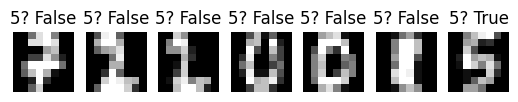

In [36]:
num_digits_to_display=7

for i in range(num_digits_to_display):
    plt.subplot(1, num_digits_to_display, i + 1)

    # Display the image
    plt.imshow(digits.images[1719 - i], cmap='gray')

    # Make a prediction
    some_digit = digits.data[1719 - i].reshape(1, -1)
    classification = knn_clf.predict(some_digit)

    # Display the title with the predicted class
    plt.title(f"5? {classification[0]}")
    plt.axis('off')

plt.show()


## Performance Measures

Evaluating a classifier is often significantly trickier than evaluating a regressor, so we will spend a large part of this chapter on this topic. There are many performance measures available, so grab another coffee and get ready to learn many new concepts and acronyms!

A good way to evaluate a model is to use cross-validation. Let’s use the cross_val_score() function to evaluate your KNN model using K-fold cross-validation, with three folds. Remember that K-fold crossvalidation means splitting the training set into K-folds (in this case, three), then making predictions and evaluating them on each fold using a model trained on the remaining folds.

### Measuring Accuracy Using Cross-Validation

In [37]:
from sklearn.model_selection import cross_val_score

cross_val_score(knn_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.99628942, 0.99443414, 0.99628942])

### Confusion Matrix

A much better way to evaluate the performance of a classifier is to look at the confusion matrix. The general idea is to count the number of times instances of class A are classified as class B. For example, to know the number of times the classifier confused images of 5s with 3s, you would look in the 5 th row and 3 rd column of the confusion matrix.

To compute the confusion matrix, you first need to have a set of predictions, so they can be compared to the actual targets. You could make predictions on the test set, but let’s keep it untouched for now (remember that you want to use the test set only at the very end of your project, once you have a classifier that you are ready to launch). Instead, you can use the cross_val_predict() function. Just like the cross_val_score() function, cross_val_predict() performs K-fold cross-validation, but instead of returning the evaluation scores, it returns the predictions made on each test fold. This means that you get a clean prediction for each instance in the training set (“clean” meaning that the prediction is made by a model that never saw the data during training).


Now you are ready to get the confusion matrix using the confusion_matrix() function. Just pass it the target classes (y_train_5) and the predicted classes (y_train_pred):

In [38]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict(knn_clf, X_train, y_train_5, cv=3)
confusion_matrix(y_train_5, y_train_pred)

array([[1452,    1],
       [   6,  158]])

Each row in a confusion matrix represents an actual class, while each column represents a predicted class. The first row of this matrix considers non-5 images (the negative class): 1,452 of them were correctly classified as non-5s (they are called true negatives), while the remaining 1 was wrongly classified as 5s (false positives). The second row considers the images of 5s (the positive class): 6 were wrongly classified as non-5s (false negatives), while the remaining 158 were correctly classified as 5s (true positives). A perfect classifier would have only true positives and true negatives, so its confusion matrix would have nonzero values only on its main diagonal (top left to bottom right):